# **Introduction**

### **Aim of the model**
The target feature is Accident_severity which is a multi-class variable.

The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Your metric for evaluation will be f1-score

# **Importing librabries**

We will first have a section where we will import required libraries for our model building. Each time a new library is required to be built we will come to this section and code. This will help us have consolidated list of libraries which can be used for future reference as well 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,recall_score, precision_score, f1_score,confusion_matrix

# **Accessing and reading the dataset**

In order to start working on data, we need to access and get the dataset read.

In [2]:
rta_df = pd.read_csv("RTA Dataset.csv")
display(rta_df)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Copy of dataset

In order to main tain a backup for original data, it is advisable to maintain a make a deep copy of the same. 

Proceeding we will use this copy as we progress in our project development.

In [3]:
rta_df1 = rta_df.copy(deep= True)

display(rta_df1.head())

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# **Exploratory Data Analysis**

It is important to explore data so that we may gain some insights of the dataset. 

### **1.Getting some data details**

Obtaining basic data details is essential. We will use `df.info` to retrieve basic details

*Reference : https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/*

In [4]:
rta_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### **2.Checking for duplicate values and unique values :**

We need to know if any rows are repeated and how many as well. We can find out this by using `df.duplicated().sum`.

It is a good practice to identify the continuous and categorical variables in the data. For this we will use `df.nunique()` as it will give us the number of unique values in each column. 

In [5]:
display("Number od duplicated rows :",rta_df1.duplicated().sum())

'Number od duplicated rows :'

0

In [6]:
display("Number of unique values in each feature: ", rta_df1.nunique())

'Number of unique values in each feature: '

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

**Observation**

With few number of unique values, we can infer that the dataset contains mostly categorical data.

### **3. Knowing some basic statistics**
Getting to know basic statistics such as mean, median, mode, etc., of the data will help improve understanding of data. We will use `.df.describe()` function of pandas.
As we realise from above code, most data is categorical we need to include this in getting to know our statistics. This is an argument to be passed in the describe function of pandas

Reference (to include categorical variables) : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [7]:
rta_df1.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **4.Knowing some details of the target variable**

It is important for us to understand the target variable, which is *"Accident_severity"*. Without this it would be difficult for us to proceed in building a model.

Moreover, a graphical representation will help us enhance our understanding.

*Reference : https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/*

'Target variable in figures:'

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

'Graphical representation of the target variable:'

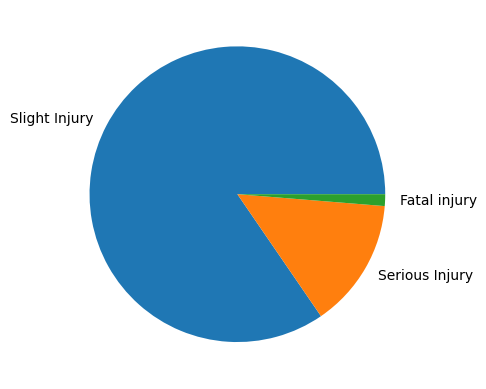

In [8]:

display("Target variable in figures:" ,rta_df1["Accident_severity"].value_counts())
display("Graphical representation of the target variable:")
pct = (rta_df1["Accident_severity"].value_counts()/len(rta_df1["Accident_severity"]))*100
plt.pie(rta_df1["Accident_severity"].value_counts(), labels= rta_df1["Accident_severity"].unique())
plt.show;

**Observation**

From the above graph we can infer that most cases have resulted with *slight injury*, followed by some cases resulting in *serious injury*. There are few cases of *fatal injury*.

# **Preprocessing of Data**

Data preprocessing is a proven method for resolving issues with incomplete, noisy, and inconsistent raw input data. Issues such as ambiguous and unexpected results of modeling on raw data. With the insights of EDA, you must've understood the shortcomings of your dataset. Use preprocessing techniques to clean and remove those vulnerabilities from the dataset.

Besides data quantity, data quality has fundamental effect on modeling performance. The analysis and correction of data quality issues is thus one of the most crucial activities of the data modeling lifecycle.

The notion of clean data entails multiple aspects, that all have to be analysed and ensured, so modeling can be successful.

### **1.Checking for missing values**

`df.isnull()` is widely been in all pre-processing steps to identify null values in the data.

We will use, `df.isnull().sum()` is used to get the total number of missing records in each column. 

In addition, it is better to know the percentage of missing values in each column. For this we will use `(df.isnull().sum()/(len(df)))*100`

In [9]:
count_of_missing_values = rta_df1.isnull().sum()
display("Count of missing values in each column:", count_of_missing_values)


'Count of missing values in each column:'

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [10]:
percentage_of_missing_values = ((rta_df1.isnull().sum()/(len(rta_df1)))*100).round(decimals = 2)
display("Percentage of missing values in each column:", percentage_of_missing_values)


'Percentage of missing values in each column:'

Time                            0.00
Day_of_week                     0.00
Age_band_of_driver              0.00
Sex_of_driver                   0.00
Educational_level               6.02
Vehicle_driver_relation         4.70
Driving_experience              6.73
Type_of_vehicle                 7.71
Owner_of_vehicle                3.91
Service_year_of_vehicle        31.89
Defect_of_vehicle              35.95
Area_accident_occured           1.94
Lanes_or_Medians                3.13
Road_allignment                 1.15
Types_of_Junction               7.20
Road_surface_type               1.40
Road_surface_conditions         0.00
Light_conditions                0.00
Weather_conditions              0.00
Type_of_collision               1.26
Number_of_vehicles_involved     0.00
Number_of_casualties            0.00
Vehicle_movement                2.50
Casualty_class                  0.00
Sex_of_casualty                 0.00
Age_band_of_casualty            0.00
Casualty_severity               0.00
W

Ideally if any column has 80% or more of null values, we can drop those columns. Here, this is not the case. One approach is to encode categorical data and check for correlation and make a decision to keep or delete the columns with more null values. The other approach is, to simply drop columns with high percentage of null values. This may lead to data loss.

For convenience, we will delete the columns with missing values more than 20%.  

In [11]:
columns_to_delete = ["Vehicle_driver_relation", "Defect_of_vehicle", "Work_of_casuality", "Fitness_of_casuality"]
rta_df1.drop(columns_to_delete, axis=1, inplace= True)


In [12]:
display("Columns remaining in rta_df1: ", rta_df1.columns)
display("New shape of rta_df1:", rta_df1.shape)

'Columns remaining in rta_df1: '

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

'New shape of rta_df1:'

(12316, 28)

Checking null values after dropping the non-essential columns

In [13]:
count_of_null_values = rta_df1.isnull().sum()
display(count_of_null_values)

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity           

### **2. Missing values treatment**

There are multiple ways to treat missing values.

*Reference : https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python/notebook#Treating-Missing-values*

Missing values are a "silent killer", which can be very hard to detect automatically, so explicit manual care has to be taken to ensure it is discovered and handled appropriately.

In general it is true:

The conscious and proper handling of missing datapoints is of outmost importance for all data science activities!

There are multiple ways to treat missing values, such as

- dropping rows : We can use `df.dropna()` to omit rows with NaN values
- dropping columns : incase there are more than 80% missing values we can use `df.drop()` to eliminate those columns from the dataframe.
- Imputation :- is another method of treating missing values. Here we fill missing values using various methods such as `df.fillna(specify_constant_value / specify_method- such as ffill,bfill, df.mean())` etc..


**Extracting column names with null values**

In [14]:
def to_get_list_of_null_values(count_of_null_values):
    columns_with_null_values =[]
    for k,v in count_of_null_values.items():
        if v > 0:
            columns_with_null_values.append(k)
    return columns_with_null_values 


list_of_null_values = to_get_list_of_null_values(count_of_null_values)
display (list_of_null_values)

['Educational_level',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement']

**Imputing null values**

Now we have fewer null values which we can fill using `df.fillna().mode()`. The reason behind using mode as a manner to fill missing values is that, most data we need to fill is categorical data. This function has to be implemented on each column with null values.

In [15]:
def to_fill_missing_values(df, list_of_null_values):
    for i in list_of_null_values: 
        for column in df:
            mode = df[column].mode()[0]
            if column == i:
                df.fillna(mode, inplace = True)
    return df
 
filled_rta_df1 = to_fill_missing_values(rta_df1, list_of_null_values)    
display(filled_rta_df1.sample(10))

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
9842,3:55:00,Monday,18-30,Male,High school,1-2yr,Junior high school,Owner,1-2yr,Residential areas,...,2,2,Moving Backward,Driver or rider,Male,18-30,3,Not a Pedestrian,Changing lane to the left,Slight Injury
241,9:47:00,Saturday,Over 51,Male,Junior high school,Above 10yr,Pick up upto 10Q,Owner,Above 10yr,Other,...,3,1,Going straight,na,na,na,na,Not a Pedestrian,Changing lane to the left,Slight Injury
8612,10:40:00,Wednesday,18-30,Male,Elementary school,5-10yr,Junior high school,Owner,2-5yrs,Office areas,...,3,2,Going straight,Passenger,Female,18-30,3,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
591,18:00:00,Sunday,31-50,Male,Writing & reading,5-10yr,Motorcycle,Owner,1-2yr,Other,...,1,1,Going straight,Passenger,Male,Under 18,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4415,18:55:00,Sunday,Under 18,Male,Junior high school,Below 1yr,Lorry (41?100Q),Owner,Junior high school,Other,...,1,4,Going straight,Driver or rider,Male,5,3,Not a Pedestrian,No distancing,Serious Injury
7216,10:20:00,Friday,Over 51,Male,Elementary school,Above 10yr,Lorry (11?40Q),Owner,Junior high school,Office areas,...,3,1,Going straight,Passenger,Female,18-30,3,Not a Pedestrian,No distancing,Slight Injury
213,7:00:00,Thursday,18-30,Male,Above high school,1-2yr,Automobile,Owner,2-5yrs,Other,...,2,1,Unknown,Driver or rider,Male,18-30,3,Not a Pedestrian,Other,Slight Injury
2356,7:00:00,Friday,18-30,Male,High school,Above 10yr,Public (13?45 seats),Owner,Junior high school,Recreational areas,...,2,1,Reversing,na,na,na,na,Not a Pedestrian,No priority to vehicle,Slight Injury
1220,16:00:00,Tuesday,31-50,Male,Junior high school,2-5yr,Lorry (41?100Q),Owner,Junior high school,Residential areas,...,1,1,Reversing,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
7762,18:26:00,Saturday,Under 18,Male,Junior high school,5-10yr,Automobile,Owner,1-2yr,Outside rural areas,...,2,1,Going straight,Driver or rider,Male,18-30,3,Not a Pedestrian,Changing lane to the right,Serious Injury


Let us check the number of null values

In [16]:
filled_rta_df1.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

### **3. Saving the file for future reference**

We will save this current file using **joblib** for future reference. This is an important step before we encode categorical data.

*Reference : https://www.analyticsvidhya.com/blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/#:~:text=The%20pickle%20module%20keeps%20track,like%20the%20one%20we%20used.*

*Reference : https://www.analyticsvidhya.com/blog/2023/02/how-to-save-and-load-machine-learning-models-in-python-using-joblib-library/*

Compared to other techniques of storing and loading machine learning models, using Joblib has a number of benefits. Since data is stored as byte strings rather than objects, it may be stored quickly and easily in a smaller amount of space than traditional pickling. Moreover, it automatically corrects errors when reading or writing files, making it more dependable than manual pickling. Last but not least, using joblib enables you to save numerous iterations of the same model, making it simpler to contrast them and identify the most accurate one.

Joblib enables multiprocessing across several machines or cores on a single machine, which enables programmers to parallelize jobs across numerous machines. This makes it simple for programmers to utilize distributed computing resources like clusters or GPUs to accelerate their model training process.
We shall save the dataset to a variable, which is the model_name and then use `joblib.dump(model_name, "file_name_to_be_stored")`. Used to save or models


**To save a dataframe using pandas**

`import pandas as pd
df.to_csv("./dataset_name.csv",index=False)`

In [17]:
rta_df_before_encoding_categorical_data = rta_df1
joblib.dump(rta_df_before_encoding_categorical_data, "rta_df1.joblib")

['rta_df1.joblib']

### **4. Encoding categorical data**
It is important to encode categorical data to further explore and work around with data. It refers to the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process. The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.

The popular Python machine learning library *Scikit-learn* provides `OneHotEncoder()` method that can be used for one hot encoding. Then, there is also the Pandas method called `get_dummies()` for one hot encoding.

Reference : https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

Reference : https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/?utm_content=cmp-true



In [18]:
def ordinal_encoder(df, column_names): 
    for column in column_names:    
        column_val = list(np.arange(df[column].nunique()))
        column_key = list(df[column].sort_values().unique())
        column_dict = dict(zip(column_key, column_val))
        df[column] = df[column].map(column_dict)
    return df

rta_df_encoded = ordinal_encoder(rta_df1, rta_df1.drop(['Accident_severity'], axis=1).columns)
rta_df_encoded.shape

(12316, 28)

In [19]:
display("Few lines of the encoded dataset: ")
rta_df_encoded.head()

'Few lines of the encoded dataset: '

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,420,1,0,1,0,0,0,4,3,10,...,1,1,2,3,2,5,3,5,9,Slight Injury
1,420,1,1,1,4,3,12,4,2,7,...,1,1,2,3,2,5,3,5,16,Slight Injury
2,420,1,0,1,4,0,6,4,5,1,...,1,1,2,0,1,1,2,5,0,Serious Injury
3,594,3,0,1,4,2,12,0,5,7,...,1,1,2,2,0,0,2,5,1,Slight Injury
4,594,3,0,1,4,1,3,4,2,4,...,1,1,2,3,2,5,3,5,16,Slight Injury


Now since our missing values are imputed and categorical data is converted to numerical form, we can develop and test a number of hypothesis

### **Developing and testing hypothesis**

At this stage we can check for various hypothesis. Hypothesis testing will help us know if certain generalised thought processes are true or false.



### **Checking correlation**

This is an important part of model building as correlations reveal their level of impact on the target variable. 

We will use `df.corr(method="pearson")` to check correlations among the variables in the datatset.

In [20]:
display("Correlation between features of the dataset excluding the target variable: ")
rta_df_encoded.iloc[:,:-1].corr(method= "pearson")

'Correlation between features of the dataset excluding the target variable: '

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
Time,1.000000,0.019232,-0.012789,-0.021671,-0.022084,-0.007650,0.009719,-0.001781,-0.005395,-0.021460,...,0.002373,-0.014626,-0.052321,-0.004482,-0.005392,-0.002097,-0.002922,-0.007779,-0.009007,-0.003898
Day_of_week,0.019232,1.000000,0.019993,0.009986,-0.004517,-0.003190,-0.001787,0.004468,-0.025850,0.004014,...,0.000825,-0.005621,-0.050042,-0.028174,0.006661,0.001461,-0.003642,0.001512,0.000250,0.010516
Age_band_of_driver,-0.012789,0.019993,1.000000,-0.351878,0.013613,-0.014061,0.002271,0.005643,0.001616,0.011016,...,0.000916,0.001690,-0.054474,-0.005647,0.005386,0.011358,0.000043,0.003565,0.000372,-0.000703
Sex_of_driver,-0.021671,0.009986,-0.351878,1.000000,0.004967,0.010908,-0.000980,-0.008571,0.008347,0.000725,...,-0.011065,-0.038643,0.048503,0.002964,0.003335,-0.006046,0.014191,0.002474,0.006981,-0.000598
Educational_level,-0.022084,-0.004517,0.013613,0.004967,1.000000,0.095214,0.006202,-0.013585,0.001553,-0.005340,...,-0.010063,0.012401,0.003698,0.004691,0.005382,0.007483,0.008226,0.004950,0.000177,-0.000451
Driving_experience,-0.007650,-0.003190,-0.014061,0.010908,0.095214,1.000000,0.015198,-0.017490,0.013464,0.012888,...,0.013617,-0.006422,-0.009350,-0.002554,-0.002505,0.000744,-0.009976,-0.005369,-0.016538,-0.004629
Type_of_vehicle,0.009719,-0.001787,0.002271,-0.000980,0.006202,0.015198,1.000000,0.003235,0.008753,-0.001881,...,0.024498,0.000781,0.004368,0.011472,-0.007932,-0.011384,-0.011067,-0.002981,0.009540,-0.003790
Owner_of_vehicle,-0.001781,0.004468,0.005643,-0.008571,-0.013585,-0.017490,0.003235,1.000000,-0.018146,-0.036730,...,-0.003140,0.009633,-0.002058,0.022484,-0.002548,0.001318,0.006576,0.003419,0.018426,0.019341
Service_year_of_vehicle,-0.005395,-0.025850,0.001616,0.008347,0.001553,0.013464,0.008753,-0.018146,1.000000,-0.012550,...,0.024250,0.008489,0.006180,-0.004485,-0.001875,0.004391,-0.003651,0.006935,-0.006104,-0.004258
Area_accident_occured,-0.021460,0.004014,0.011016,0.000725,-0.005340,0.012888,-0.001881,-0.036730,-0.012550,1.000000,...,-0.002495,-0.016643,-0.003662,0.007429,0.010809,0.010323,0.008530,0.014048,0.001573,-0.009727


The correlation output is always comprehensive because of many variables. Thus it is advisable to use the heatmap representation of this correlation data.

*Reference : https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/*

*Reference : https://seaborn.pydata.org/generated/seaborn.heatmap.html*

We will use code `sns.heatmap(df.corr(), annot = True)`

*annot = True (displays cell values)*

*cmap (is used for application of colour princilpes as in matplotlib*

'Heatmap on correlation among all variables except target variable: '

<Axes: >

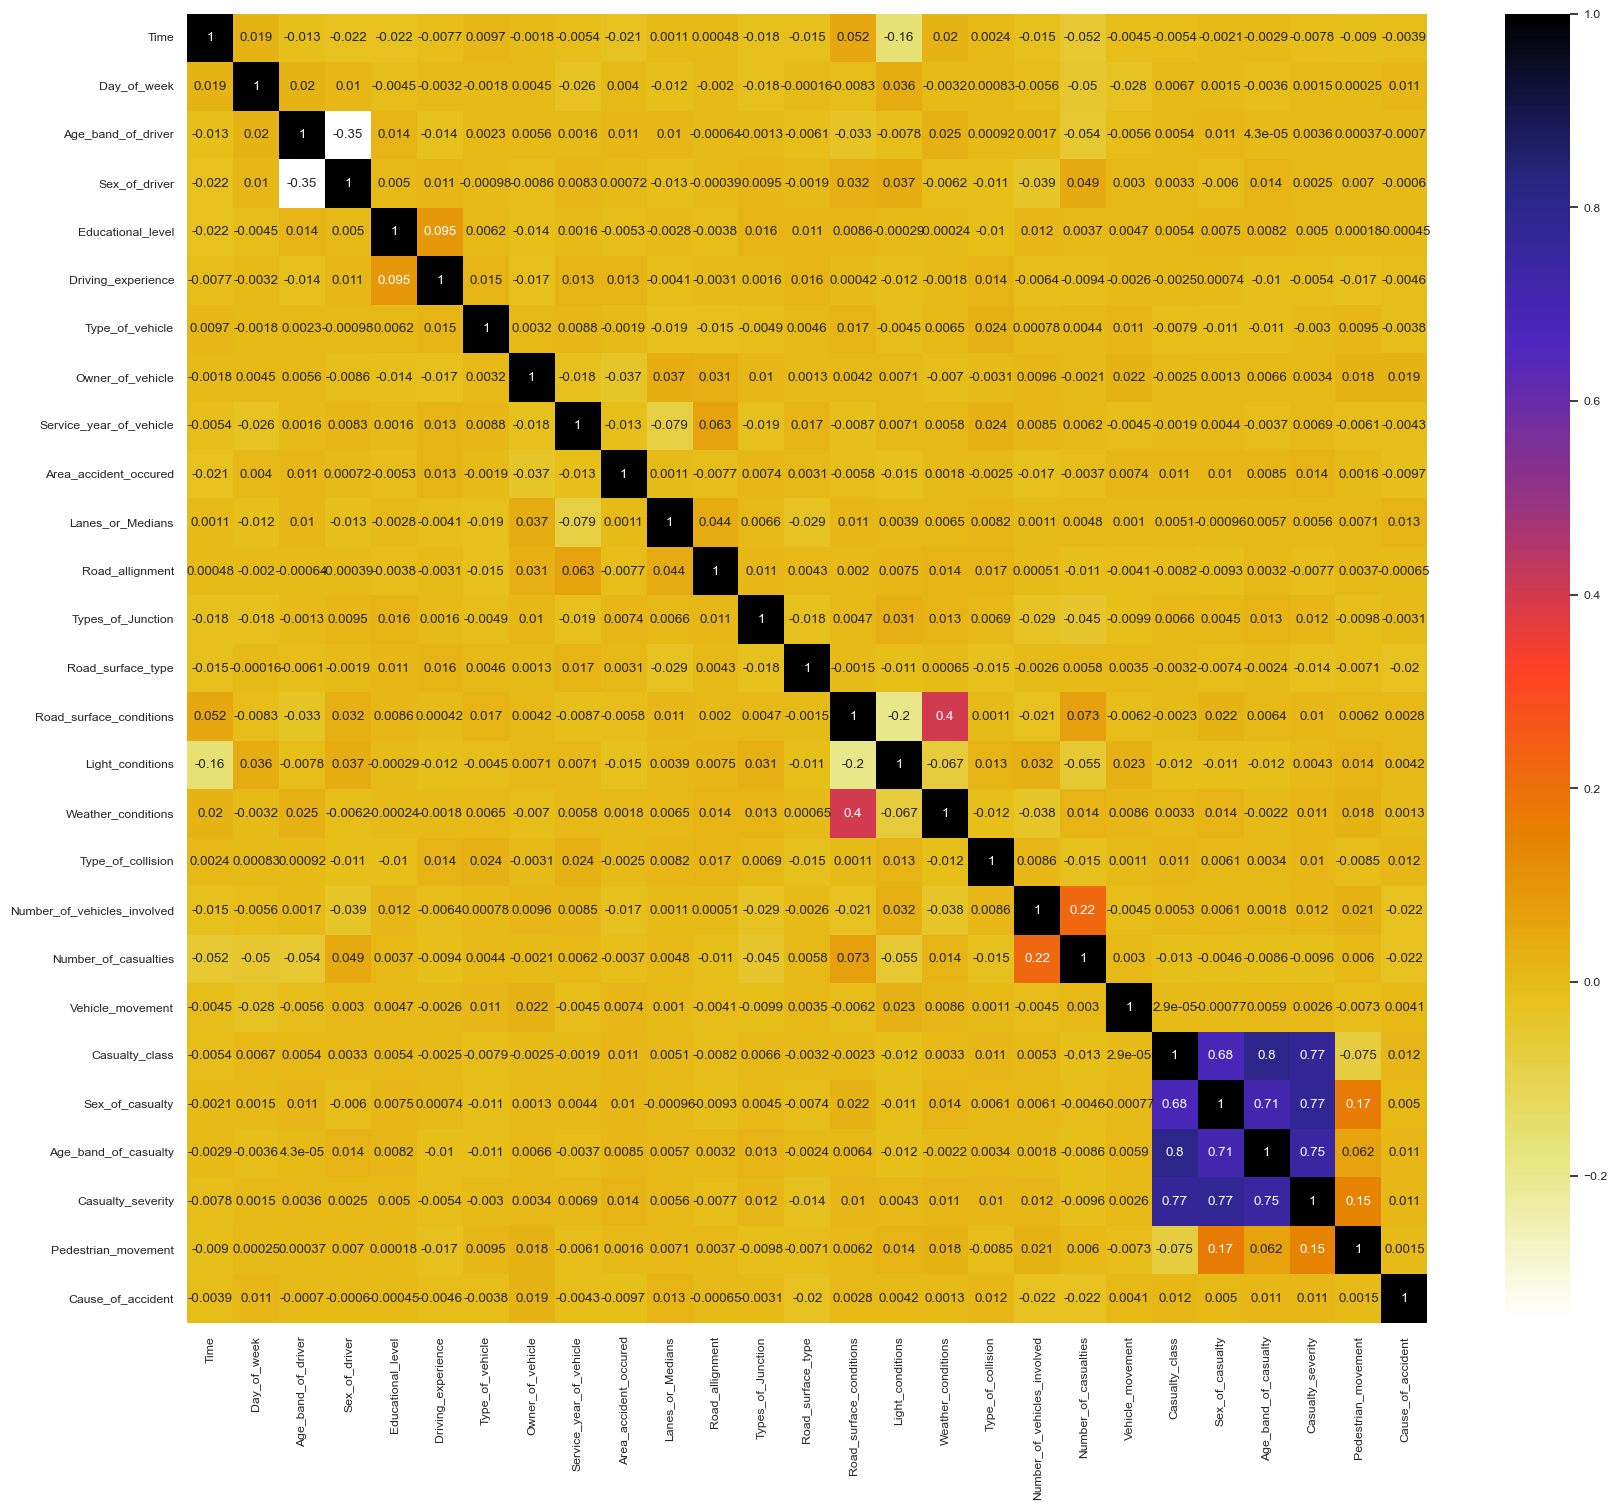

In [21]:
display("Heatmap on correlation among all variables except target variable: ")
plt.figure(figsize=(20,17))
sns.set(font_scale=0.8)
sns.heatmap(rta_df_encoded.iloc[:,:-1].corr(method= "pearson"), annot=True, cmap=plt.cm.CMRmap_r)

### **5.Managing imbalanced data**

As we have earlier analysed our target variable, we inferred that most observations fall under the category "slight injury" and extremely few observations belong to "serious injury" and "fatal injury". This shows how imbalanced our data is. This is a big drawback as no matter how good our model is it will give us a biased prediction of the most common class without performing any analysis.

Thus it is important for us to data augment to avoid this critical bias in the dataset and resulting performance as well.

*Reference : https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook*

In this case we need to increase the samples for the last two categories of severity. Thus we will be using the upsampling technique by using SMOTE rom the **imblearn** library.

**SMOTE (Synthetic Minority Oversampling TEchnique)** consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
We'll use ratio='minority' to resample the minority class.



**1. Train-test split**

In order to manage imbalanced data, it is a good practice to split data into training data and testing data. This will help us build our model on one part of the data and then test its goodness on a smaller portion of the same data.

In order to train_test split our data we will use `sklearn.model_selection.train_test_split`. We will divide data on train : test in the ratio 70:30 respectively.

In [22]:
X = rta_df_encoded.drop('Accident_severity', axis=1)
y = rta_df_encoded['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 27) (3695, 27) (8621,) (3695,)


We are aware from our  previous analysis of target variable that our data is highly imbalanced. Let us look at some values of the target variable based on the different category of information available. 

In [23]:
display("Figures and respective percentages of target variable before data augmentation: ")
display(y_train.value_counts())

(y_train.value_counts()/len(y_train))*100

'Figures and respective percentages of target variable before data augmentation: '

Accident_severity
Slight Injury     7324
Serious Injury    1191
Fatal injury       106
Name: count, dtype: int64

Accident_severity
Slight Injury     84.955342
Serious Injury    13.815103
Fatal injury       1.229556
Name: count, dtype: float64

The above figures show how imbalanced our data is. We need to augment the data and make it balance. This is important otherwise, the model we build will predict values for the most common category without doing any analysis. This helps remove biasness of data.

With an aim to augment and balance our data we will be using`imblearn` library and `SMOTE` class for upsampling of the data.

In [24]:
rta_df_train_augmented = SMOTE()
X_train, y_train = rta_df_train_augmented.fit_resample(X_train, y_train)


Now let us check for the figures of the augmented data for our target variable.

In [25]:
display("Figures and respective percentages of target variable after data augmentation: ")
display(y_train.value_counts())

(y_train.value_counts()/len(y_train))*100

'Figures and respective percentages of target variable after data augmentation: '

Accident_severity
Slight Injury     7324
Serious Injury    7324
Fatal injury      7324
Name: count, dtype: int64

Accident_severity
Slight Injury     33.333333
Serious Injury    33.333333
Fatal injury      33.333333
Name: count, dtype: float64

In [26]:
display("Few lines of train data: ", X_train.head())

'Few lines of train data: '

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,934,6,1,1,2,0,0,4,6,8,...,2,1,0,1,2,0,1,2,5,0
1,886,6,1,1,1,4,15,4,3,8,...,9,1,0,2,0,1,0,2,5,16
2,880,3,4,0,4,0,8,4,6,8,...,2,1,0,2,0,1,0,2,5,3
3,846,2,1,1,4,2,10,4,3,8,...,9,1,0,2,0,1,0,2,5,1
4,114,5,3,1,2,1,0,2,2,2,...,2,3,5,2,0,1,1,2,5,12


So far we have not encoded values in our target variable. We shall do so now just before proceeding with building up a model. 

In [27]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

# Basic Modelling

Now our data is ready for building a predictive model. We will be building a classification model based on two methods of processing, namely the bagging method and the boosting method. 

We will prepare three models, one using XGBoost which is a boosting method. The next using RandomForest which is a bagging method. Finally, one using ExtraTree which is an averaging method. All these would be prepared based on metrics of `f1-score` for evaluation.

We will be building two models, one using **XGBoost** and the other using **RandomForest**. The reason behind selection of these two is that both use DecisionTree classifier which gives a better result. The XG boosting algorithm creates a sequential ensemble of tree models, all of which work to improve each other and determine the final output. While Random Forest is a bagging model that trains multiple trees in parallel, and the final output is whatever the majority of trees decide.

*Reference : https://www.qwak.com/post/xgboost-versus-random-forest#:~:text=The%20XG%20boosting%20algorithm%20can,the%20regressor%20predicts%20continuous%20values.*

*Reference : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html*

*Reference : https://scikit-learn.org/stable/modules/model_evaluation.html*

We will also check their accuracy scores in order to evaluate, which of these is better.

In [28]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [29]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.8129905277401894], 'rf': [0.8008119079837619], 'extree': [0.8100135317997293]}


**Accuracy scores for train data**

XGBoost = 81.57%

RandomForest = 79.84%

ExtraTrees = 80.81% 

Now let us test the models on test data

In [34]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)

display(y_pred_xgb, y_pred_rf, y_pred_ext)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

array([2, 2, 2, ..., 2, 2, 2])

array([2, 2, 2, ..., 2, 2, 2])

### Performance evaluation of the model

We will be checking on performance evaluation based on `f1-score`.

In [38]:
def model_evaluation(model_name,y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    Accuracy  =  accuracy_score(y_test, y_pred)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
    return conf_matrix, Accuracy, Precision, Recall, F1_score

display("The following evaluations are in the order of confusion_matrix, accuracy_score, recall_score and f1_score respectively: ", model_evaluation("rf", y_test, y_pred_rf)    )

'The following evaluations are in the order of confusion_matrix, accuracy_score, recall_score and f1_score respectively: '

(array([[   2,    7,   43],
        [   2,   92,  458],
        [   3,  223, 2865]], dtype=int64),
 0.8008119079837619,
 0.7587287689094582,
 0.8008119079837619,
 0.7747543195377437)